In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Netflix Movies and TV SHows, Exploratory Data Analysis(EDA)
This Project Explores Netflix's catalog of Movies and TV Shows to uncover Patterns in content type, genre distributions, release trends, and regional presence using Exploratory Data Analysis techniques.

## 1. Problem Statement

Netflix hosts a diverse catalog of movies and TV shows across multiple countries, genres, and time periods.
Understanding how this content is distributed and how it has evolved over time is important for identifying
platform growth trends, content strategy shifts, and potential areas for future expansion.

This exploratory data analysis aims to examine the composition of Netflix’s content library based on content type,
release patterns, ratings, genres, and regional contributions. The insights derived from this analysis can help
understand Netflix’s strategic focus and provide a data-driven foundation for future machine learning applications
such as content recommendation, trend forecasting, and audience segmentation.

##2. Data Overview

In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
df.isnull().sum().sort_values(ascending = False)

,0
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


In [8]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##3. Data Cleaning

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df["date_Added"] = pd.to_datetime(df["date_added"], errors = "coerce")

In [11]:
df["duration"].unique()[:10]

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min'],
      dtype=object)

In [12]:
df["duration_value"] = df["duration"].str.extract(r"(\d+)").astype(float)
df["duration_unit"] = df["duration"].str.extract(r"(min|Season|Seasons)")

In [13]:
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")

In [14]:
df["country"] = df["country"].fillna("Unknown")

In [15]:
for col in ["type", "rating", "country", "listed_in"]:
    df[col] = df[col].str.strip()

## 4. Feature Engineering

In [16]:
df["year_added"] = df["date_Added"].dt.year
df["month_added"] = df["date_Added"].dt.month

In [17]:
df["content_age"] = df["year_added"] - df["release_year"]

In [18]:
df["num_genres"] = df["listed_in"].apply(lambda x: len(x.split(",")))

In [19]:
df["primary_country"] = df["country"].apply(lambda x: x.split(",")[0])

In [20]:
df[["listed_in", "num_genres"]].head()

,listed_in,num_genres
0,Documentaries,1
1,"International TV Shows, TV Dramas, TV Mysteries",3
2,"Crime TV Shows, International TV Shows, TV Act...",3
3,"Docuseries, Reality TV",2
4,"International TV Shows, Romantic TV Shows, TV ...",3


In [21]:
df["primary_country"].head()

,primary_country
0,United States
1,South Africa
2,Unknown
3,Unknown
4,India


In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_Added,duration_value,duration_unit,year_added,month_added,content_age,num_genres,primary_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,90.0,min,2021.0,9.0,1.0,1,United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,2.0,Season,2021.0,9.0,0.0,3,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,1.0,Season,2021.0,9.0,0.0,3,Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,1.0,Season,2021.0,9.0,0.0,2,Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,2.0,Season,2021.0,9.0,0.0,3,India


## 5. Univariate Analysis

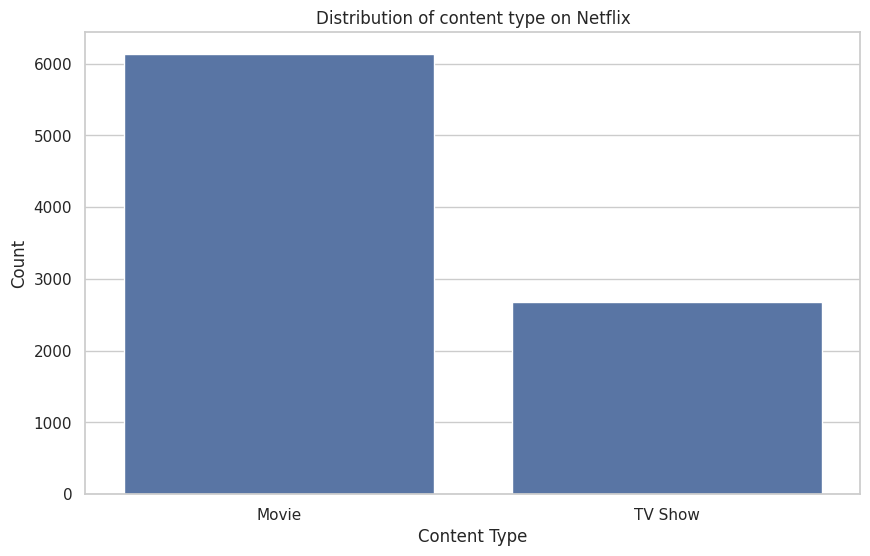

In [23]:
sns.countplot(data = df, x = "type")
plt.title("Distribution of content type on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

**Insight:**  
Movies dominate Netflix’s content library compared to TV shows. This indicates that while Netflix invests heavily in long-form series, standalone movies remain the primary content offering, possibly due to their broader appeal and lower long-term production commitment.


<function matplotlib.pyplot.show(close=None, block=None)>

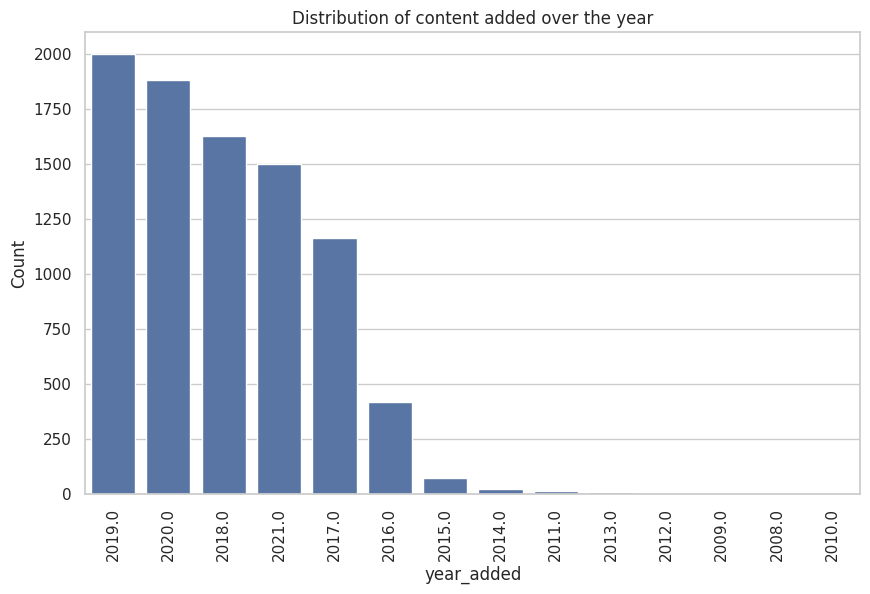

In [24]:
sns.countplot(data = df, x = "year_added", order = df["year_added"].value_counts().index)
plt.xticks(rotation = 90)
plt.title("Distribution of content added over the year")
plt.xlabel("year_added")
plt.ylabel("Count")
plt.show

**Insight:**  
The number of titles added to Netflix increases significantly after the mid-2010s, highlighting a rapid expansion phase. This reflects Netflix’s aggressive content acquisition and production strategy as competition in the streaming market intensified.


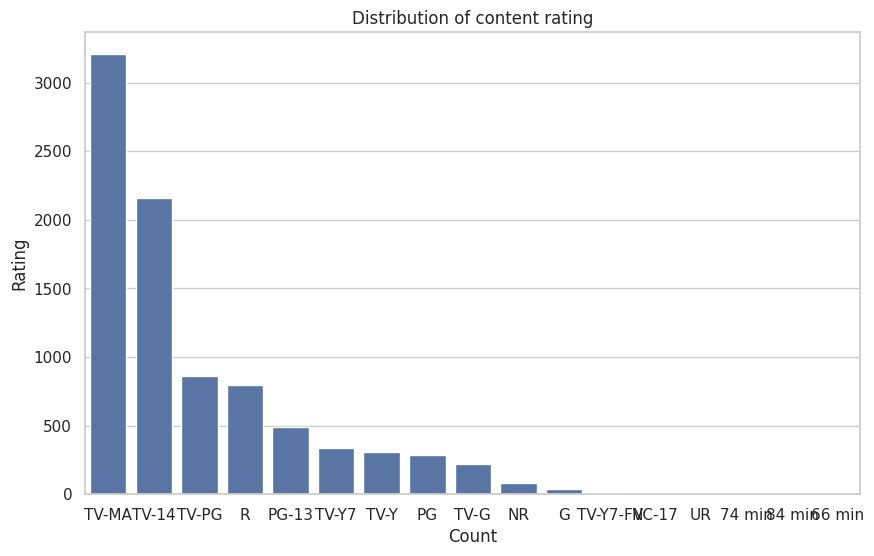

In [25]:
sns.countplot(data = df, x = "rating", order = df["rating"].value_counts().index)
plt.title("Distribution of content rating")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

**Insight:**  
Mature ratings such as TV-MA and TV-14 appear most frequently in Netflix’s catalog. This suggests that Netflix’s content strategy is largely oriented toward adult and young-adult audiences rather than exclusively family-friendly programming.


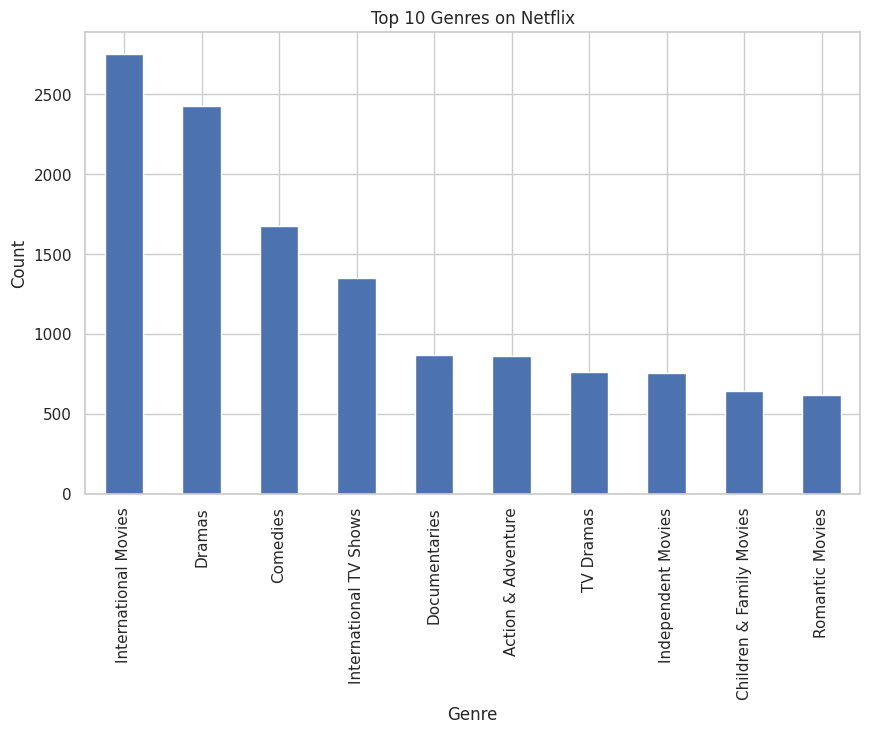

In [26]:
top_genres = df["listed_in"].str.split(", ").explode().value_counts().head(10)
top_genres.plot(kind = "bar")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

**Insight:**  
Genres such as International Movies, Dramas, and Comedies dominate the Netflix catalog. This indicates a strong emphasis on globally appealing and emotionally engaging content, supporting Netflix’s strategy to serve a diverse international audience.


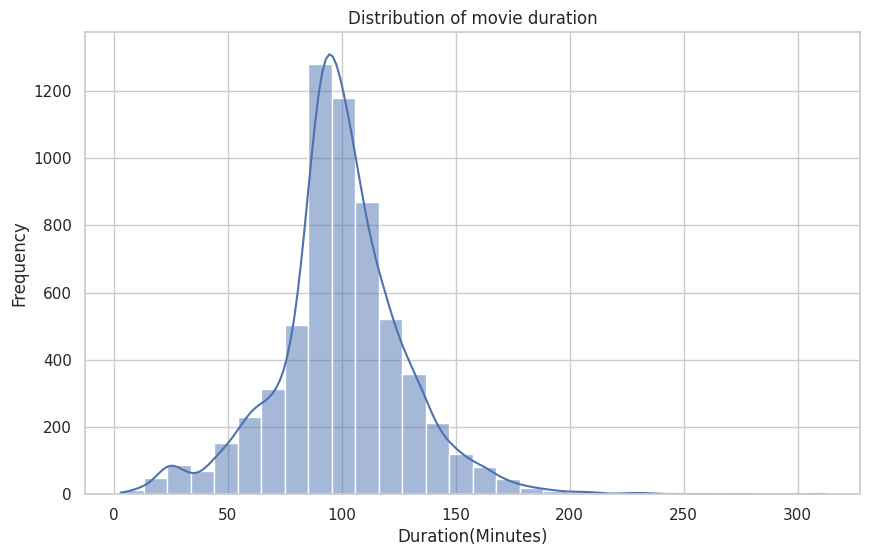

In [27]:
movie_duration = df[df["type"] == "Movie"]["duration_value"]
sns.histplot(movie_duration, bins = 30, kde = True)
plt.title("Distribution of movie duration")
plt.xlabel("Duration(Minutes)")
plt.ylabel("Frequency")
plt.show()

**Insight:**  
Most Netflix movies fall within a typical feature-length duration range, with fewer extremely short or long titles. This suggests standardization in movie production length, aligning with audience viewing expectations and platform norms.


## 6. Bivariate Analysis

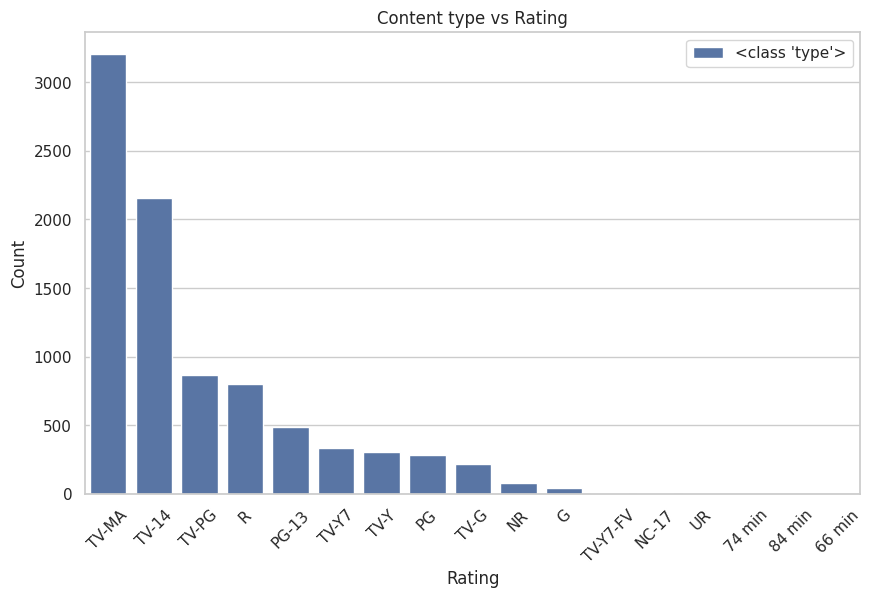

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = "rating", hue = type, order = df["rating"].value_counts().index)
plt.xticks(rotation = 45)
plt.title("Content type vs Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


TV shows are more concentrated in mature ratings compared to movies, indicating Netflix’s strategy of using episodic content to engage adult audiences over longer periods.

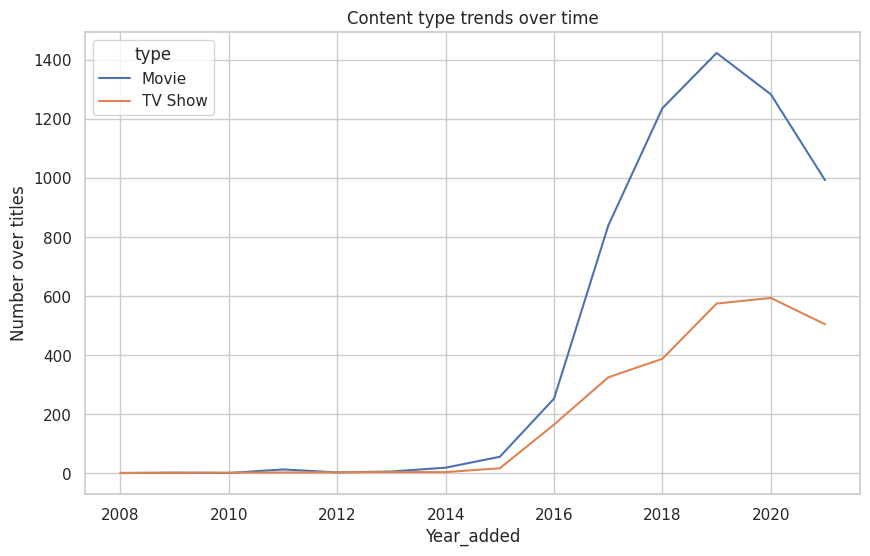

In [29]:
content_trend = df.groupby(["year_added", "type"]).size().reset_index(name = "count")
sns.lineplot(data = content_trend, x = "year_added", y = "count", hue = "type")
plt.title("Content type trends over time")
plt.xlabel("Year_added")
plt.ylabel("Number over titles")
plt.show()

While movies have consistently dominated Netflix’s catalog, the number of TV shows has grown rapidly in recent years, reflecting a strategic shift toward long-term, binge-worthy content.

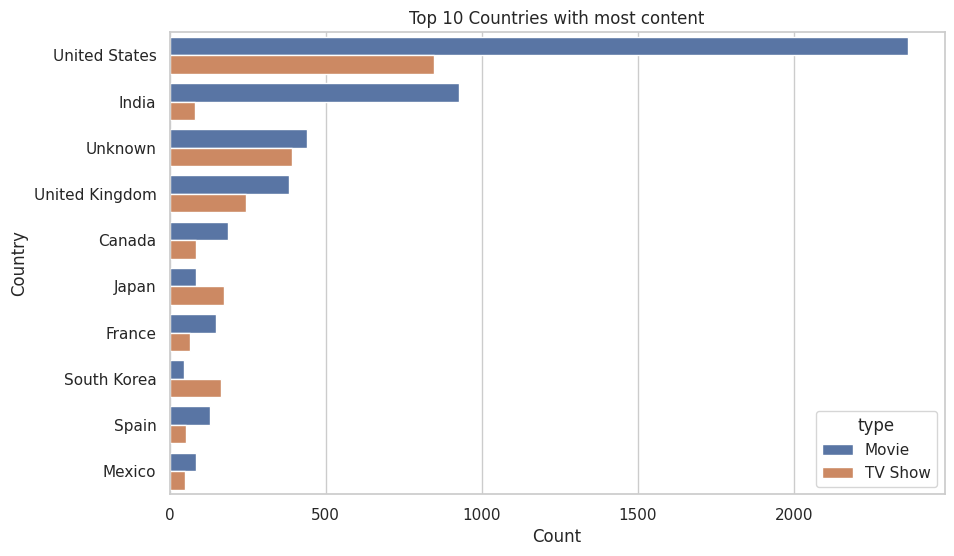

In [30]:
top_countries = df["primary_country"].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.countplot(
    data = df[df["primary_country"].isin(top_countries)],
    y = "primary_country",
    hue = "type",
    order = top_countries

)
plt.title("Top 10 Countries with most content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

The United States dominates Netflix’s content production for both movies and TV shows, while other countries contribute more selectively, highlighting Netflix’s global expansion with a strong US-centric base.

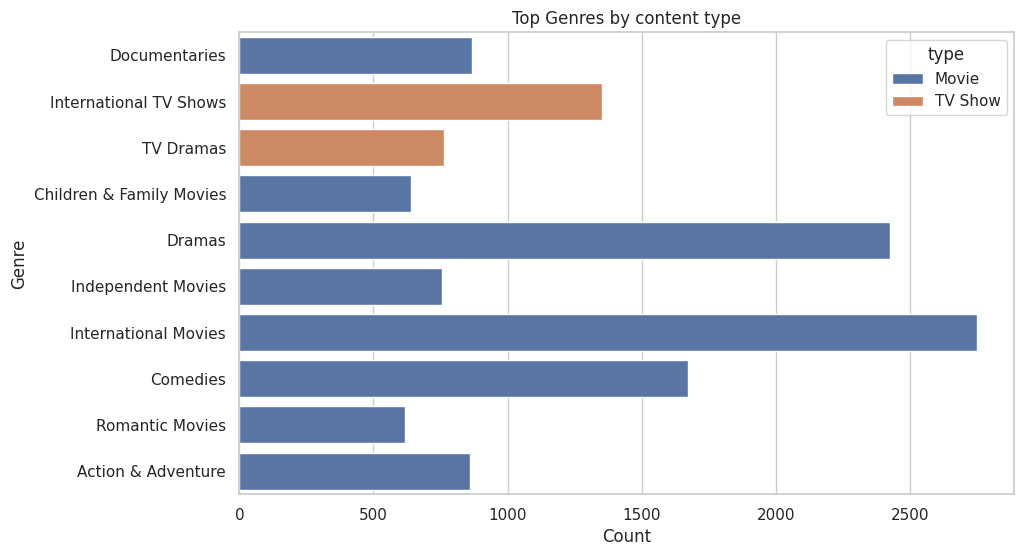

In [32]:
top_genres = (
    df["listed_in"]
    .str.split(", ")
    .explode()
    .value_counts()
    .head(10)
)
top_genres_list = top_genres.index.tolist()
genre_type = (
    df.assign(genre = df["listed_in"].str.split(", "))
    .explode("genre")
    .query("genre in @top_genres_list")
)
plt.figure(figsize=(10, 6))
sns.countplot(data = genre_type, y = "genre", hue = "type")
plt.title("Top Genres by content type")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

Genres such as documentaries and international content show a stronger presence in movies, whereas dramas and comedies are more prominent in TV shows, indicating genre-specific content strategies.

## 7. Insights & Conclusion

### Key Insights

- Movies form the majority of Netflix’s content library, although TV shows have shown rapid growth in recent years.
- Netflix experienced significant expansion after the mid-2010s, reflecting an aggressive content acquisition and production phase.
- Mature audience ratings such as TV-MA and TV-14 dominate the catalog, indicating a strong focus on adult and young-adult audiences.
- The United States remains the largest contributor to Netflix’s content, while international contributions highlight Netflix’s global expansion strategy.
- Genres such as dramas, international movies, and comedies appear most frequently, emphasizing globally appealing and emotionally engaging content.
- TV shows are more prominent in certain genres, suggesting Netflix’s preference for episodic formats to retain user engagement.

### Conclusion

This exploratory data analysis provides a comprehensive understanding of Netflix’s content distribution and strategic trends.
The analysis reveals a clear shift toward TV shows in recent years, alongside sustained dominance of movie content.
Netflix’s emphasis on mature ratings and internationally diverse genres reflects its focus on a global adult audience.

From a data perspective, the dataset is well-suited for further machine learning applications such as content recommendation systems,
trend forecasting models, and audience segmentation, as the underlying patterns and feature relationships have been clearly identified through EDA.


---

**Note:**  
This project focuses on exploratory data analysis to build strong data intuition and inform future machine learning modeling decisions.
